In [1]:
import os
from dotenv import load_dotenv
from src.components.ingestion import IngestionComponent
from src.components.transformer import TransformerComponent
from src.config.config import TRAIN_DATA

c:\Users\ernes\Documents\ML Projects\brain_cancer\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
_=load_dotenv()

In [3]:
ingestion=IngestionComponent()
train_path, valid_path, test_path=ingestion.init_component()

In [4]:
transformer=TransformerComponent(train_path=train_path, valid_path=valid_path, test_path=test_path)
train_dataset,valid_dataset,test_dataset=transformer.init_transform()

Found 6734 files belonging to 4 classes.
Found 1324 files belonging to 4 classes.
Found 1323 files belonging to 4 classes.


In [17]:
os.listdir(path)

['glioma', 'healthy', 'meningioma', 'pituitary']

In [19]:
int(1500 * 0.8)

1200

In [28]:
import random

nums=list(range(100))
splits=[0.8, 0.1, 0.1]

random.shuffle(nums)

num_elements=len(nums)
train_size=int(num_elements * splits[0])
val_size=int(num_elements * splits[1])
test_size=int(num_elements * splits[2])


In [30]:
train=nums[:train_size]
val=nums[train_size:(train_size+val_size)]
test=nums[-test_size:]

print('train', train)
print('val', val)
print('test', test)

train [25, 77, 81, 13, 54, 9, 20, 35, 88, 31, 23, 3, 43, 56, 42, 7, 19, 55, 59, 87, 50, 94, 62, 12, 58, 75, 4, 2, 63, 92, 18, 30, 40, 53, 5, 10, 46, 76, 65, 93, 27, 24, 69, 70, 11, 60, 0, 48, 22, 73, 52, 36, 85, 44, 57, 47, 99, 72, 39, 97, 8, 37, 26, 34, 96, 61, 91, 68, 82, 78, 17, 51, 21, 28, 80, 95, 41, 98, 86, 90]
val [33, 14, 66, 79, 15, 16, 89, 32, 64, 38]
test [67, 84, 83, 6, 45, 74, 1, 49, 71, 29]


In [24]:
val_size, train_size

(10, 80)

In [15]:
os.path.join(TRAIN_DATA ,os.listdir(TRAIN_DATA)[0])

'c:\\Users\\ernes\\Documents\\ML Projects\\brain_cancer\\data\\train\\glioma'

In [17]:
an_image_path=os.path.join(os.path.join(TRAIN_DATA ,os.listdir(TRAIN_DATA)[0]), os.listdir(os.path.join(TRAIN_DATA ,os.listdir(TRAIN_DATA)[0]))[0])
an_image_path

'c:\\Users\\ernes\\Documents\\ML Projects\\brain_cancer\\data\\train\\glioma\\0000.jpg'

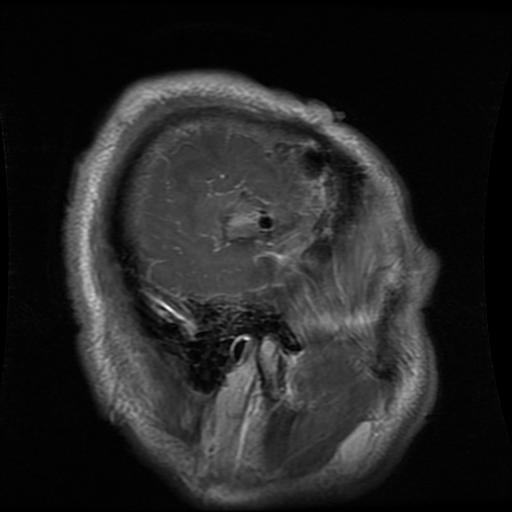

In [19]:
from PIL import Image
image=Image.open(an_image_path)
image

In [23]:
import numpy as np

np.array(image).shape

(512, 512, 3)

In [9]:
import numpy as np

np.clip(5, a_min=1, a_max=2)

np.int64(2)

In [12]:
2 ** (5)

32

In [19]:
np.clip(2 ** (5 + np.arange5)), a_min=32, a_max=512)

array([ 32,  64, 128, 256, 512])

In [17]:
2 ** np.arange(5)

array([ 1,  2,  4,  8, 16])

In [22]:
512 / 4

128.0

In [23]:
from tensorflow.keras.layers import Dense

In [25]:
Dense(1, activation='leaky_relu')

<Dense name=dense_1, built=False>

In [30]:
2 ** (6 +np.arange(6))

array([  64,  128,  256,  512, 1024, 2048])

In [96]:
x=np.linspace(0, 10, 1000)
y = 2*x + np.random.randn(x.shape[0])*2

x_train, x_test=np.expand_dims(x[:int(len(x)*0.8)], axis=-1), np.expand_dims(x[int(len(x)*0.8):], axis=-1)
y_train, y_test=y[:int(len(x)*0.8)], y[int(len(x)*0.8):]

In [97]:
import keras_tuner
import tensorflow as tf
from tensorflow.keras import layers as L

In [108]:
def build_model(hp):
    units=hp.Choice('units', [4, 5, 6])
    model=tf.keras.Sequential([
        L.Dense(units=units, activation='relu'),
        L.Dense(1)
    ])
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    
    return model


In [134]:
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective='val_loss',
    max_trials=5,
    directory=r'C:\Users\ernes\Documents\ML Projects\brain_cancer\artifacts',
    overwrite=True
)

In [135]:
tuner.search(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Trial 3 Complete [00h 00m 06s]
val_loss: 4.541290760040283

Best val_loss So Far: 4.541290760040283
Total elapsed time: 00h 00m 19s


In [136]:
tuner.results_summary()

Results summary
Results in C:\Users\ernes\Documents\ML Projects\brain_cancer\artifacts\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 6
Score: 4.541290760040283

Trial 1 summary
Hyperparameters:
units: 5
Score: 26.228315353393555

Trial 0 summary
Hyperparameters:
units: 4
Score: 66.93881225585938


In [144]:
sh=tuner.get_best_hyperparameters(1)[0]

In [146]:
best_model=build_model(sh)
best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 45.0520 - mae: 5.7309 - mse: 45.0520 - val_loss: 153.7620 - val_mae: 12.2013 - val_mse: 153.7620
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.2041 - mae: 5.2545 - mse: 38.2041 - val_loss: 131.5256 - val_mae: 11.2576 - val_mse: 131.5256
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.6724 - mae: 5.1206 - mse: 36.6724 - val_loss: 111.1342 - val_mae: 10.3167 - val_mse: 111.1342
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.2227 - mae: 4.4381 - mse: 28.2227 - val_loss: 93.0278 - val_mae: 9.4026 - val_mse: 93.0278
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7905 - mae: 3.9859 - mse: 22.7905 - val_loss: 76.6853 - val_mae: 8.4937 - val_mse: 76.6853
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6563 - mae: 3.5539 - mse: 18.6563 - val_loss: 62.4540 - val_mae: 7.6144 - val_mse: 62.4540
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.7826 - mae: 3.244

In [137]:
model=tuner.get_best_models(1)[0]

c:\Users\ernes\Documents\ML Projects\brain_cancer\venv\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [140]:
model.predict(np.array([2.5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[5.081553]], dtype=float32)

In [139]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.8012 - mae: 1.5616 - mse: 3.8012 - val_loss: 4.4246 - val_mae: 1.6824 - val_mse: 4.4246
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2623 - mae: 1.6423 - mse: 4.2623 - val_loss: 4.5657 - val_mae: 1.7096 - val_mse: 4.5657
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3509 - mae: 1.6516 - mse: 4.3509 - val_loss: 4.5433 - val_mae: 1.7055 - val_mse: 4.5433
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2322 - mae: 1.6180 - mse: 4.2322 - val_loss: 4.4395 - val_mae: 1.6856 - val_mse: 4.4395
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1926 - mae: 1.6134 - mse: 4.1926 - val_loss: 4.3941 - val_mae: 1.6767 - val_mse: 4.3941
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0863 - mae: 1.5989 - mse: 4.0863 - val_loss: 4.3729 - val_mae: 1.6724 - val_mse: 4.3729
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2736 - mae: 1.6245 - mse: 4.2736 - val_loss: 4.4062 - val_mae

In [149]:
h=tuner.get_best_hyperparameters()[0]

In [152]:
h['units']

6